# Defect Trends & Root Cause Analysis
**Objective:** Analyze defect trends, identify root causes, and provide actionable recommendations to reduce defects and repair costs.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fahmidachowdhury/manufacturing-defects")

print("Path to dataset files:", path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Path to dataset files: /kaggle/input/manufacturing-defects


## Step 1: Data Loading & Cleaning

In [2]:
# Loading CSV
df = pd.read_csv("/kaggle/input/manufacturing-defects/defects_data.csv")

# Sample rows
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [3]:
# Checking missing values
df.isna().sum()

defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64

In [4]:
# Dataset Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [5]:
# Converting defect_date to datetime
df['defect_date'] = pd.to_datetime(df['defect_date'], errors='coerce')

In [6]:
# Dataset Summary after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   defect_id          1000 non-null   int64         
 1   product_id         1000 non-null   int64         
 2   defect_type        1000 non-null   object        
 3   defect_date        1000 non-null   datetime64[ns]
 4   defect_location    1000 non-null   object        
 5   severity           1000 non-null   object        
 6   inspection_method  1000 non-null   object        
 7   repair_cost        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# check for inconsistencies
df.columns

Index(['defect_id', 'product_id', 'defect_type', 'defect_date',
       'defect_location', 'severity', 'inspection_method', 'repair_cost'],
      dtype='object')

In [9]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [10]:
# Sample rows after cleaning
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64


## Step 2: Exploratory Data Analysis & Visualizations

### 🔸 Basic Stats





In [11]:
# Total defects
total_defects = len(df['defect_id'])
print(total_defects)

1000


In [12]:
# Unique products
unique_products = df['product_id'].nunique()
print(unique_products)

100


In [13]:
# Unique defect types
print(df['defect_type'].unique())

['Structural' 'Functional' 'Cosmetic']


In [14]:
# Unique inspection methods
print(df['inspection_method'].unique())

['Visual Inspection' 'Automated Testing' 'Manual Testing']


In [15]:
# Average, min, max repair_cost
min_repair_cost = np.min(df['repair_cost'])
max_repair_cost = np.max(df['repair_cost'])
avg_repair_cost = np.mean(df['repair_cost'])

print(f'Min: {min_repair_cost}, Max: {max_repair_cost}, Avg: {avg_repair_cost}')

Min: 10.22, Max: 999.64, Avg: 507.62715


### 🔸 Defect Trends








month
January     191
March       175
May         167
February    160
April       156
June        151
Name: defect_id, dtype: int64


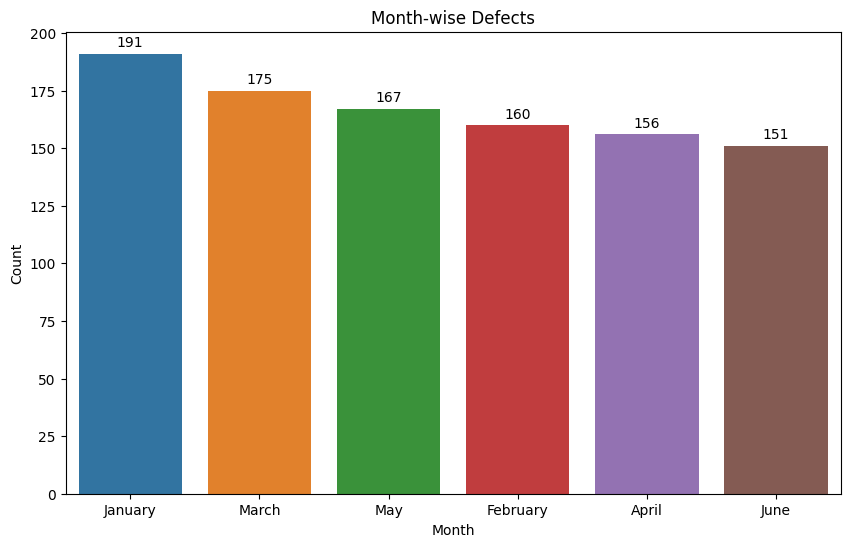

In [16]:
# Plot number of defects by month → detect peaks

df['month'] = df['defect_date'].dt.month_name()

df.head()

monthly_defects = df.groupby('month')['defect_id'].count().sort_values(ascending=False)
print(monthly_defects)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=monthly_defects.index, y=monthly_defects.values)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title("Month-wise Defects")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

## Month-wise Defects

**Observation:**  
- January has the highest number of defects (191), followed by March (175) and May (167).  
- June and April have the lowest counts (151 and 156 respectively).  

**Insight:**  
- There may be **seasonal or batch-specific factors** affecting defect rates.  
- Peaks in January and March could indicate **high production volumes** or **process inefficiencies** during these months.  
- Preventive maintenance, additional inspections, or resource planning could be prioritized during these high-defect months to reduce overall defects.


defect_type
Cosmetic      513.908479
Functional    507.096106
Structural    502.624574
Name: repair_cost, dtype: float64


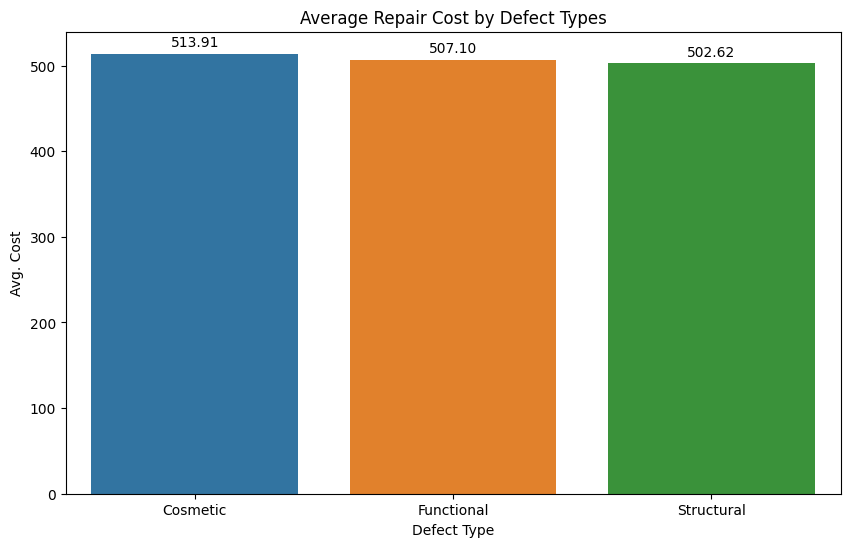

In [17]:
# Find average repair cost by defect type

avg_type_cost = df.groupby('defect_type')['repair_cost'].mean()
print(avg_type_cost)

plt.figure(figsize=(10,6))
ax1 = sns.barplot(x=avg_type_cost.index, y=avg_type_cost.values)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', padding=3)

plt.title("Average Repair Cost by Defect Types")
plt.xlabel("Defect Type")
plt.ylabel("Avg. Cost")
plt.show()

## Average Repair Cost by Defect Type

**Observation:**  
- Cosmetic defects have the highest average repair cost (~₹514), followed by Functional (~₹507) and Structural (~₹503).  
- The differences are relatively small, but Cosmetic defects slightly increase overall repair expenses.

**Insight:**  
- Cosmetic defects, though often minor, may require **manual repairs or finishing work**, leading to slightly higher costs.  
- Structural and Functional defects might be addressed more systematically via **Automated or Visual inspections**, keeping average costs lower.  
- Understanding cost patterns by defect type can help prioritize **resource allocation and process improvements** to reduce overall repair expenses.


severity
Minor       514.432877
Critical    505.871622
Moderate    501.634078
Name: repair_cost, dtype: float64


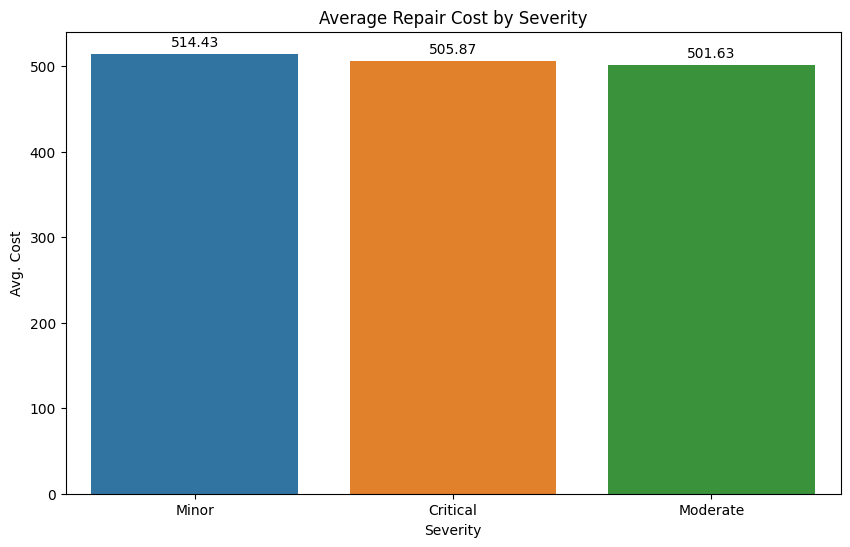

In [18]:
# Calculate average repair cost by severity

avg_severity_cost = df.groupby('severity')['repair_cost'].mean().sort_values(ascending=False)
print(avg_severity_cost)

plt.figure(figsize=(10,6))
ax2 = sns.barplot(x=avg_severity_cost.index, y=avg_severity_cost.values)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', padding=3)

plt.title("Average Repair Cost by Severity")
plt.xlabel("Severity")
plt.ylabel("Avg. Cost")
plt.show()

## Average Repair Cost by Severity

**Observation:**  
- Minor defects have the highest average repair cost (~₹514), followed by Critical (~₹506) and Moderate (~₹502) defects.  
- The differences are relatively small, but interestingly, Minor defects cost slightly more on average than Critical ones.

**Insight:**  
- Minor defects may involve **manual finishing, cosmetic corrections, or repeated small repairs**, which can accumulate costs.  
- Critical and Moderate defects might be **systematically addressed through Automated Testing or structured repair processes**, keeping average costs slightly lower.  
- Understanding cost patterns by severity helps in **optimizing inspection focus and repair strategies** to reduce overall expenses.


defect_type
Structural    352
Functional    339
Cosmetic      309
Name: count, dtype: int64


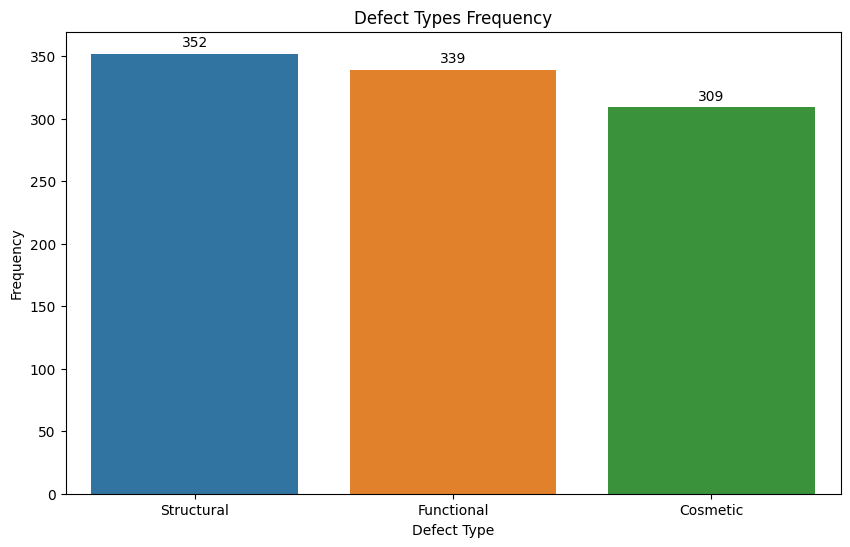

In [19]:
# Analyze defect types frequency (Structural, Functional, Cosmetic)

type_freq = df['defect_type'].value_counts()
print(type_freq)

plt.figure(figsize=(10,6))
ax3 = sns.barplot(x=type_freq.index, y=type_freq.values)

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', padding=3)

plt.title("Defect Types Frequency")
plt.xlabel("Defect Type")
plt.ylabel("Frequency")
plt.show()

## Defect Types Frequency

**Observation:**  
- Structural defects are the most frequent (352 occurrences), followed by Functional (339) and Cosmetic defects (309).  
- The differences are moderate, but Structural defects slightly dominate the dataset.

**Insight:**  
- Structural defects may point to **design or material weaknesses** in the product.  
- Functional defects suggest areas for **process or assembly improvements**, while Cosmetic defects, though fewer, still require attention to maintain product quality.  
- Knowing the frequency of defect types can help **prioritize quality control measures** and target specific defect categories for prevention.


### 🔸 Inspection & Location Analysis

inspection_method
Automated Testing    501.804310
Manual Testing       526.074687
Visual Inspection    494.054074
Name: repair_cost, dtype: float64


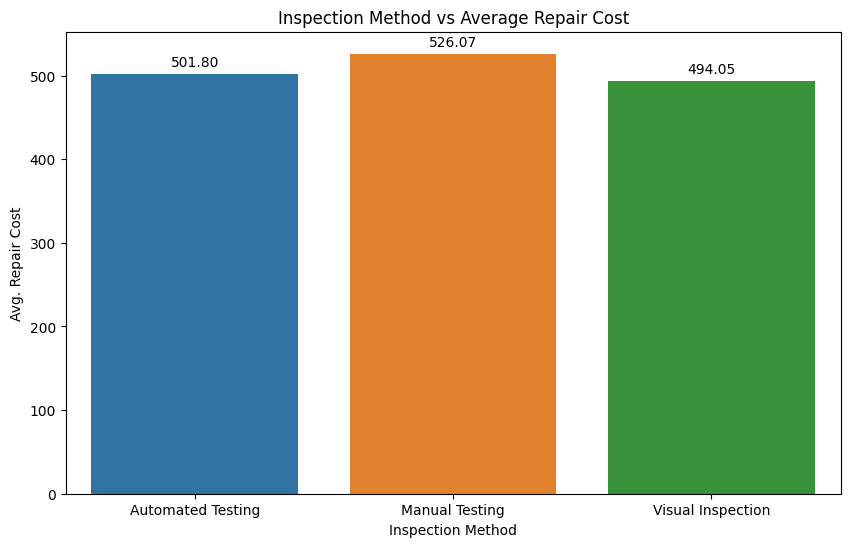

In [20]:
# Compare inspection method vs average repair cost
avg_method_cost = df.groupby('inspection_method')['repair_cost'].mean()
print(avg_method_cost)
plt.figure(figsize=(10,6))
ax4 = sns.barplot(x=avg_method_cost.index, y=avg_method_cost.values)

for container in ax4.containers:
    ax4.bar_label(container, fmt='%.2f', padding=3)

plt.title("Inspection Method vs Average Repair Cost")
plt.xlabel("Inspection Method")
plt.ylabel("Avg. Repair Cost")
plt.show()

## Inspection Method vs Average Repair Cost

**Observation:**  
- Manual Testing has the highest average repair cost (~₹526), followed by Automated Testing (~₹502) and Visual Inspection (~₹494).  
- Automated Testing is moderately costly but more systematic, while Manual Testing tends to incur higher expenses.

**Insight:**  
- Manual inspections may lead to **higher repair costs** due to human error, repeated checks, or labor-intensive corrections.  
- Automated Testing, while effective in detecting critical defects, keeps costs more consistent.  
- Visual Inspection is the least costly but may miss some defects.  
- This analysis suggests **optimizing inspection methods** by combining Automated Testing for critical components and improving Manual Testing protocols for minor defects to control costs.


defect_location
Surface      353
Component    326
Internal     321
Name: count, dtype: int64


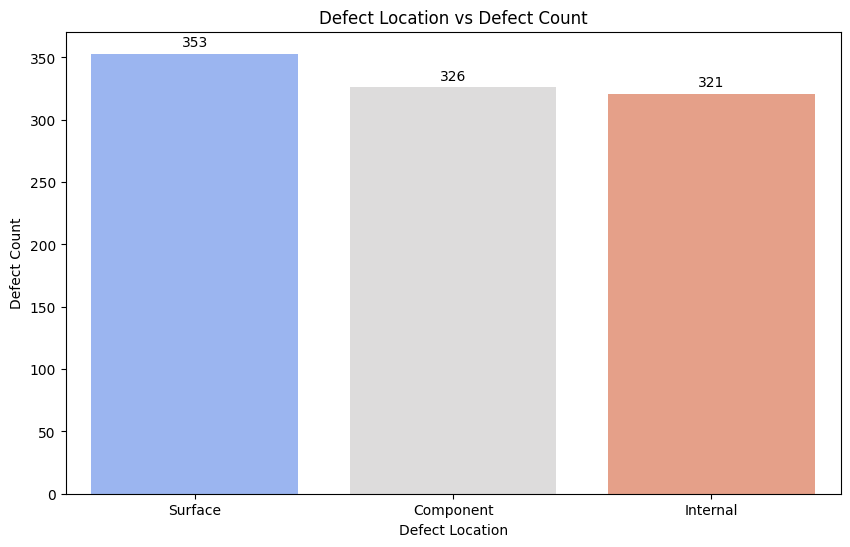

In [21]:
# Compare defect location vs defect count
defect_loc_cou = df['defect_location'].value_counts()
print(defect_loc_cou)

plt.figure(figsize=(10,6))
ax5 = sns.barplot(x=defect_loc_cou.index, y=defect_loc_cou.values, palette='coolwarm')

for container in ax5.containers:
    ax5.bar_label(container, fmt='%d', padding=3)

plt.title("Defect Location vs Defect Count")
plt.xlabel("Defect Location")
plt.ylabel("Defect Count")
plt.show()

## Defect Location vs Defect Count

**Observation:**  
- Most defects occur on the **Surface** (353), followed by **Component** (326) and **Internal** locations (321).  
- Surface defects are slightly more frequent, but Internal defects may have **higher repair costs**.

**Insight:**  
- Surface defects are easier to detect and repair, which may explain the higher count.  
- Internal and Component defects, though slightly fewer, could require **more complex or costly repairs**, especially if they are critical.  
- Focusing inspection and preventive measures on **Internal components** could help reduce repair costs and improve product reliability.


inspection_method
Manual Testing       119
Visual Inspection    110
Automated Testing    104
Name: count, dtype: int64


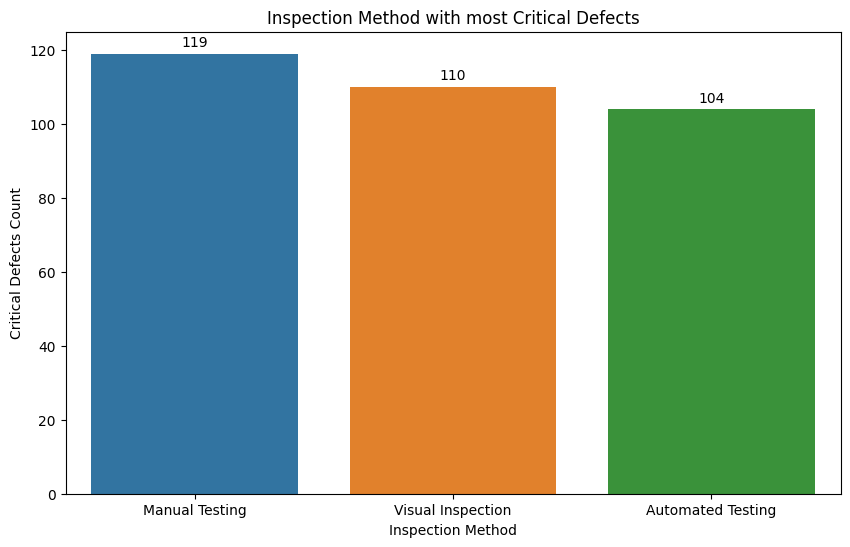

In [22]:
# Which inspection method catches the most “Critical” defects?
cri = df[df['severity']=='Critical']
critical_defects = cri['inspection_method'].value_counts()
print(critical_defects)

plt.figure(figsize=(10,6))
ax6 = sns.barplot(x=critical_defects.index, y=critical_defects.values)

for container in ax6.containers:
    ax6.bar_label(container, fmt='%d', padding=3)

plt.title("Inspection Method with most Critical Defects")
plt.xlabel("Inspection Method")
plt.ylabel("Critical Defects Count")
plt.show()

## Inspection Method with Most Critical Defects

**Observation:**  
- Manual Testing detects the highest number of Critical defects (119), followed by Visual Inspection (110) and Automated Testing (104).  
- While Automated Testing is systematic, Manual Testing identifies slightly more critical issues in this dataset.

**Insight:**  
- Manual Testing may be more effective at catching **certain critical defects** that are difficult for automated systems to detect, possibly due to **complex visual cues or unusual defects**.  
- Automated Testing is consistent but may miss some edge-case critical defects.  
- Combining **Manual and Automated inspections** can ensure **critical defects are not overlooked**, improving product quality and reducing costly failures.


In [23]:
# Export clean data into csv
df.to_csv("Defects.csv")

## Root Cause & Recommendations

### Root Cause Analysis
- **Structural defects** are mostly detected via Automated Testing, suggesting potential **design or material issues**.  
- **Critical defects** have higher repair costs and often occur internally, indicating a need for **process improvements and early-stage inspections**.  
- **Manual Testing** catches the most Critical defects, highlighting its effectiveness for **complex or hard-to-detect issues** that automated systems may miss.  
- Peaks in defects during **January and March** may indicate **seasonal or batch-specific factors**, requiring focused quality control during these periods.  
- Surface defects are the most frequent, but **Internal defects** may drive higher repair costs, suggesting targeted inspections and preventive measures.

### Recommendations
1. Prioritize **Automated Testing** for high-risk Structural and Critical defects to reduce human error and increase detection efficiency.  
2. Enhance **Manual and Visual inspection protocols** to catch edge-case defects and minor but costly issues.  
3. Implement **early-stage inspections** for Internal components to reduce costly repairs and improve reliability.  
4. Review **production batches during peak months** to identify and mitigate recurring defects.  
5. Use defect data to continuously **monitor trends and improve preventive maintenance**, reducing both frequency and repair cost of defects.


## Summary

| Metric                          | Value                          |
|---------------------------------|--------------------------------|
| Total Defects                    | 1,000                         |
| Unique Products                  | 100                             |
| Most Frequent Defect Type        | Structural (352)               |
| Defect Type with Highest Avg Cost| Cosmetic (~₹514)               |
| Highest Avg Repair Cost by Severity | Minor (~₹514)                |
| Inspection Method Catching Most Critical Defects | Manual Testing (119) |
| Most Frequent Defect Location    | Surface (353)                  |
| Peak Defect Month                | January (191 defects)          |
